In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import requests
import json

#ignore normal warnings
import warnings; warnings.simplefilter('ignore')

import gmaps

# Google developer API key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)


In [2]:
# Storing our Data World Wine filepath in a variable
data_world_wines = "../Group Porject 1 Data Somms/DataWorldWines.csv"

## Explore price with reference to different variable - find the max, min, mean - James
<br> By grape
<br> By vintage
<br>By region
<br> By vintage + region


In [3]:
# Preview the Data World Wine dataframe
data_world_wines_df = pd.read_csv(data_world_wines, encoding="ISO-8859-1")
data_world_wines_df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand


In [5]:
#create new column with price as float
data_world_wines_df['Price_Float'] = data_world_wines_df['Price'].replace('[\$,]', '', regex=True).astype(float)
data_world_wines_df.head()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float
0,1/1/1919,Spain,Cava,1919 Brut Selecci¢,88,$13.00,Catalonia,L'Arboc NV 1919 Brut Selecci¢ Sparkling (Cava),Sparkling Blend,L'Arboc,13.0
1,1/1/1929,Italy,Vernaccia di San Gimignano,NaN,87,$14.00,Tuscany,Guidi 1929 2015 Vernaccia di San Gimignano,Vernaccia,Guidi 1929,14.0
2,1/1/1929,Italy,Sangiovese di Romagna Superiore,Prugneto,84,$15.00,Central Italy,Poderi dal Nespoli 1929 2011 Prugneto (Sangiov...,Sangiovese,Poderi dal Nespoli 1929,15.0
3,1/1/1934,Portugal,NaN,Reserva Velho,93,$495.00,Colares,Adega Viuva Gomes 1934 Reserva Velho Red (Cola...,Ramisco,Adega Viuva Gomes,495.0
4,1/1/1945,France,Rivesaltes,Legend Vintage,95,$350.00,Languedoc-Roussillon,Grard Bertrand 1945 Legend Vintage Red (Rives...,Red Blend,Grard Bertrand,350.0


In [6]:
data_world_wines_df['Country'].describe()

count     24989
unique       37
top          US
freq      10576
Name: Country, dtype: object

In [7]:
data_world_wines_df['Price_Float'].describe()

count    23375.00000
mean        35.46708
std         40.83522
min          4.00000
25%         17.00000
50%         25.00000
75%         42.00000
max       2500.00000
Name: Price_Float, dtype: float64

In [8]:
#find top 5 the most expensive wine
data_world_wines_df.sort_values(by='Price_Float',ascending=False).head(10)
                                                                      

,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float
20970,1/1/2014,France,Pomerol,NaN,96,"$2,500.00",Bordeaux,Chteau Ptrus 2014 Pomerol,Bordeaux-style Red Blend,Chteau Ptrus,2500.0
10344,1/1/2010,France,Saint-milion,NaN,100,"$1,500.00",Bordeaux,Chteau Cheval Blanc 2010 Saint-milion,Bordeaux-style Red Blend,Chteau Cheval Blanc,1500.0
7158,1/1/2009,Australia,Eden Valley,Hill of Grace,91,$780.00,South Australia,Henschke 2009 Hill of Grace Shiraz (Eden Valley),Shiraz,Henschke,780.0
22902,1/1/2015,Germany,NaN,Kiedrich Grfenberg Trockenbeerenauslese,98,$775.00,Rheingau,Robert Weil 2015 Kiedrich Grfenberg Trockenbe...,Riesling,Robert Weil,775.0
15968,1/1/2012,Spain,Priorat,El Perer,96,$770.00,Catalonia,Marco Abella 2012 El Perer Carignan (Priorat),Carignan,Marco Abella,770.0
737,1/1/2003,Hungary,NaN,Essencia,94,$764.00,Tokaji,Royal Tokaji 2003 Essencia (Tokaji),Furmint,Royal Tokaji,764.0
21755,1/1/2014,France,Chevalier-Montrachet,NaN,95,$710.00,Burgundy,Olivier Leflaive 2014 Chevalier-Montrachet,Chardonnay,Olivier Leflaive,710.0
20172,1/1/2014,France,Chevalier-Montrachet,NaN,95,$685.00,Burgundy,Domaine Jacques Prieur 2014 Chevalier-Montrachet,Chardonnay,Domaine Jacques Prieur,685.0
9682,1/1/2010,Germany,NaN,Kiedrich Grfenberg Trockenbeerenauslese,96,$672.00,Rheingau,Robert Weil 2010 Kiedrich Grfenberg Trockenbe...,Riesling,Robert Weil,672.0
10962,1/1/2011,France,Pauillac,NaN,97,$660.00,Bordeaux,Chteau Latour 2011 Pauillac,Bordeaux-style Red Blend,Chteau Latour,660.0


In [13]:
data_world_wines_df['Price_Per_Points'] = data_world_wines_df['Price_Float'] / data_world_wines_df['Points']
data_world_wines_df[data_world_wines_df['Price_Float'] > 17].sort_values(by='Price_Per_Points').head(10)


,Vintage,Country,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float,Price_Per_Points
21853,1/1/2014,Austria,NaN,Ried Steiger,93,$18.00,Wachau,Fischer 2014 Ried Steiger Riesling (Wachau),Riesling,Fischer,18.0,0.193548
6045,1/1/2009,US,Mendocino,Cuvee 128,93,$18.00,California,Navarro 2009 Cuvee 128 Sauvignon Blanc (Mendoc...,Sauvignon Blanc,Navarro,18.0,0.193548
6269,1/1/2009,US,Sierra Foothills,Monarch Mine Vineyard,93,$18.00,California,Easton 2009 Monarch Mine Vineyard Sauvignon Bl...,Sauvignon Blanc,Easton,18.0,0.193548
24370,1/1/2016,Austria,NaN,Stein,93,$18.00,Kamptal,Jurtschitsch 2016 Stein Grner Veltliner (Kamp...,Grner Veltliner,Jurtschitsch,18.0,0.193548
18021,1/1/2013,US,Napa Valley,Lot 457,93,$18.00,California,Cameron Hughes 2013 Lot 457 Meritage (Napa Val...,Meritage,Cameron Hughes,18.0,0.193548
13749,1/1/2012,Portugal,NaN,Reserva,93,$18.00,Douro,Quinta da Rede 2012 Reserva Red (Douro),Portuguese Red,Quinta da Rede,18.0,0.193548
22314,1/1/2015,Canada,Beamsville Bench,Estate,93,$18.00,Ontario,Cave Spring 2015 Estate Riesling (Beamsville B...,Riesling,Cave Spring,18.0,0.193548
12207,1/1/2011,Portugal,NaN,Tinto,93,$18.00,Lisboa,Quinta de Chocapalha 2011 Tinto Red (Lisboa),Portuguese Red,Quinta de Chocapalha,18.0,0.193548
21984,1/1/2014,France,Pessac-Lognan,NaN,92,$18.00,Bordeaux,Chteau Couhins 2014 Pessac-Lognan,Bordeaux-style Red Blend,Chteau Couhins,18.0,0.195652
15494,1/1/2012,US,Columbia Valley (WA),NaN,92,$18.00,Washington,Woodinville Wine Cellars 2012 Sauvignon Blanc ...,Sauvignon Blanc,Woodinville Wine Cellars,18.0,0.195652


In [13]:
#find the most expensive wine
data_world_wines_df['Price_Float'].nlargest(3)

20970    2500.0
10344    1500.0
7158      780.0
Name: Price_Float, dtype: float64

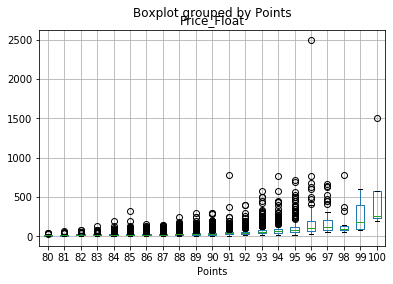

In [14]:
data_world_wines_df.boxplot('Price_Float',by="Points")

In [15]:
# Extract individual groups
# group1 = df[df["treatment"] == 1]["mosq"]
# group2 = df[df["treatment"] == 2]["mosq"]
# group3 = df[df["treatment"] == 3]["mosq"]
# group4 = df[df["treatment"] == 4]["mosq"]
# group5 = df[df["treatment"] == 5]["mosq"]

In [16]:
# stats.f_oneway(group1, group2, group3, group4, group5)

In [17]:
data_world_wines_df_grouped_grape = data_world_wines_df.groupby(['Variety'])
data_world_wines_df_grouped_grape.count()

,Vintage,Country,County,Designation,Points,Price,Province,Title,Winery,Price_Float,Price_Per_Points
Variety,,,,,,,,,,,
Agiorgitiko,8,8,0,3,8,8,8,8,8,8,8
Aglianico,72,72,72,49,72,58,72,72,72,58,58
Albana,9,9,8,8,9,8,9,9,9,8,8
Albari¤o,93,93,91,49,93,93,93,93,93,93,93
Aleatico,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Zierfandler-Rotgipfler,3,3,0,0,3,3,3,3,3,3,3
Zinfandel,517,517,516,385,517,516,517,517,517,516,516
Zlahtina,1,1,0,0,1,1,1,1,1,1,1


In [18]:
data_world_wines_df_grouped_grape.mean()['Price_Float'].nlargest(20)

Variety
Ramisco                      495.000000
Furmint                      149.000000
Champagne Blend              101.571429
Malbec Blend                  95.000000
Mazuelo                       92.000000
Vitovska                      85.000000
Pinot Noir-Syrah              80.000000
Shiraz-Cabernet               75.000000
Carignan                      69.105263
Syrah-Cabernet Franc          69.000000
Nebbiolo                      66.777283
Sangiovese Grosso             64.653846
Port                          64.333333
Malbec-Cabernet Sauvignon     62.307692
Moscatel                      60.666667
Shiraz-Viognier               60.375000
Babi?                        60.000000
Tinta Francisca               60.000000
Chardonnay-Pinot Blanc        59.000000
Tokaji                        58.833333
Name: Price_Float, dtype: float64

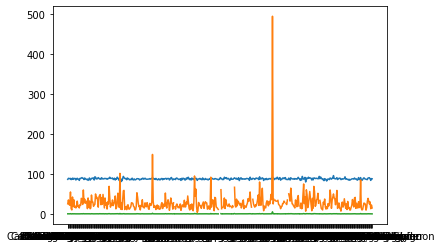

In [19]:
plt.plot(data_world_wines_df_grouped_grape.mean())

In [20]:
data_world_wines_df_grouped_country = data_world_wines_df.groupby(['Country'])
data_world_wines_df_grouped_country.count()

,Vintage,County,Designation,Points,Price,Province,Title,Variety,Winery,Price_Float,Price_Per_Points
Country,,,,,,,,,,,
Argentina,760,750,582,760,749,760,760,760,760,749,749
Australia,465,465,318,465,460,465,465,465,465,460,460
Austria,692,0,591,692,569,692,692,692,692,569,569
Brazil,9,0,9,9,7,9,9,9,9,7,7
Bulgaria,31,0,21,31,31,31,31,31,31,31,31
Canada,52,52,34,52,52,52,52,52,52,52,52
Chile,924,0,789,924,919,924,924,924,924,919,919
Croatia,15,0,9,15,15,15,15,15,15,15,15
Czech Republic,1,0,0,1,1,1,1,1,1,1,1


In [21]:
data_world_wines_df_grouped_country.count()['Price_Float'].nlargest(12)

Country
US              10538
France           3286
Italy            3228
Spain            1239
Portugal          973
Chile             919
Argentina         749
Austria           569
Australia         460
Germany           414
New Zealand       263
South Africa      252
Name: Price_Float, dtype: int64

In [22]:
top12_countries = data_world_wines_df_grouped_country.count()['Price_Float'].nlargest(12)

Text(0.5, 0, 'Country')

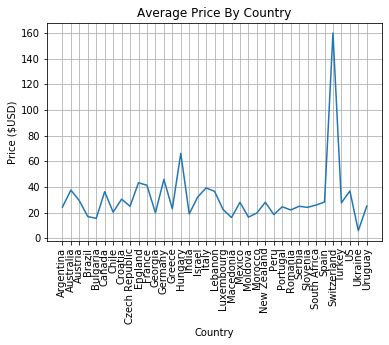

In [23]:
plt.plot(data_world_wines_df_grouped_country['Price_Float'].mean())
plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Average Price By Country')
plt.ylabel('Price ($USD)')
plt.xlabel('Country')

In [24]:
data_world_wines_df_grouped_points = data_world_wines_df.groupby(['Points'])
data_world_wines_df_grouped_points.mean()

,Price_Float,Price_Per_Points
Points,,
80,15.463768,0.193297
81,16.734848,0.206603
82,18.876623,0.230203
83,18.733333,0.225703
84,19.732980,0.234916
85,20.634684,0.242761
86,22.046721,0.256357
87,24.089380,0.276889
88,28.308500,0.321688


In [25]:
(555-14.46)/20

27.026999999999997

In [26]:
data_world_wines_df['Price_Float'].mean()/data_world_wines_df['Points'].mean()

0.40081929896656615

In [27]:
data_world_wines_df_grouped_points.count()

,Vintage,Country,County,Designation,Price,Province,Title,Variety,Winery,Price_Float,Price_Per_Points
Points,,,,,,,,,,,
80,69,69,57,38,69,69,69,69,69,69,69
81,133,133,108,85,132,133,133,133,133,132,132
82,317,317,262,188,308,317,317,317,317,308,308
83,588,588,486,348,570,588,588,588,588,570,570
84,1191,1191,979,706,1131,1191,1191,1191,1191,1131,1131
85,1798,1798,1463,1104,1678,1798,1798,1798,1798,1678,1678
86,2480,2477,2031,1567,2333,2477,2480,2480,2480,2333,2333
87,3247,3245,2716,2152,3032,3245,3247,3247,3247,3032,3032
88,3256,3255,2753,2197,3047,3255,3256,3256,3256,3047,3047


([<matplotlib.axis.XTick at 0x19a2acd4a48>,
 <a list of 21 Text xticklabel objects>)

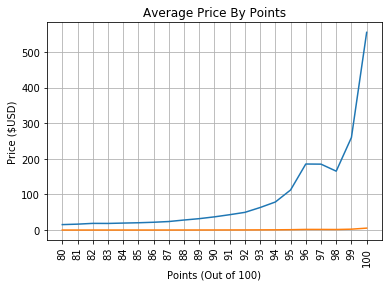

In [28]:
x_axis = np.arange(80,101,1)
plt.plot(data_world_wines_df_grouped_points.mean())
plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Average Price By Points')
plt.ylabel('Price ($USD)')
plt.xlabel('Points (Out of 100)')
plt.xticks(x_axis)

In [29]:
# plt.bar(data_world_wines_df_grouped_points.count()['Vintage'])

In [30]:
# Set line
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'])
fit = slope * x_axis + intercept

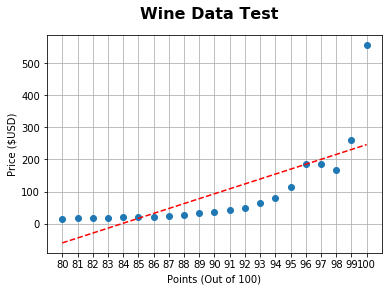

In [31]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Wine Data Test", fontsize=16, fontweight="bold")

# ax.set_xlim(0, 10)
# ax.set_ylim(0, 10)

ax.set_xlabel('Points (Out of 100)')
ax.set_ylabel('Price ($USD)')
plt.xticks(x_axis)
plt.grid(True)

ax.plot(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'], linewidth=0, marker='o')
#'b--' blue line with dashes
ax.plot(x_axis, fit, 'r--')

plt.show()

# Loop through the countries for each 

In [32]:
slope

15.293594971140783

In [33]:
r_value *r_value

0.5564581510285337

# Steps Analysis Starts Here:

In [34]:
#Regression analysis on data points from all countries
# Set line
x_axis = np.arange(80,101,1)
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'])
fit = slope * x_axis + intercept

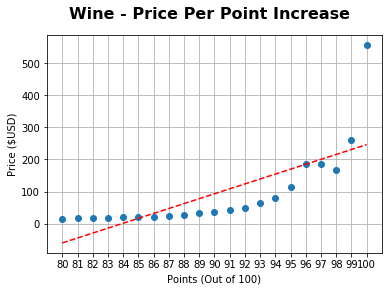

In [35]:
# Plot data
fig, ax = plt.subplots()

fig.suptitle("Wine - Price Per Point Increase", fontsize=16, fontweight="bold")

ax.set_xlabel('Points (Out of 100)')
ax.set_ylabel('Price ($USD)')
plt.xticks(x_axis)
plt.grid(True)

ax.plot(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'], linewidth=0, marker='o')
#'b--' blue line with dashes
ax.plot(x_axis, fit, 'r--')

plt.show()


In [36]:
#group df by country then points
data_world_wines_df_grouped_country_points = data_world_wines_df.groupby(['Country','Points']).mean()
data_world_wines_df_grouped_country_points.loc['France'].head()

,Price_Float,Price_Per_Points
Points,,
80,10.000000,0.125000
81,15.333333,0.189300
82,14.666667,0.178862
83,16.230769,0.195551
84,17.795031,0.211846


In [90]:
data_world_wines_df_grouped_country_points.index.isin()

Price_Float  Price_Per_Points
Country   Points                               
Argentina 80        14.071429          0.175893
          81        12.863636          0.158810
          82        14.120000          0.172195
          83        14.706897          0.177192
          84        15.082192          0.179550
...                       ...               ...
Uruguay   86        21.333333          0.248062
          87        18.000000          0.206897
          88        44.400000          0.504545
          89        32.666667          0.367041
          92        43.000000          0.467391

[352 rows x 2 columns]

In [126]:
data_world_wines_df_grouped_country_points.index.isin((top6_countries_names))

TypeError: Expected tuple, got str

TypeError: ('Argentina', 80) is not a string

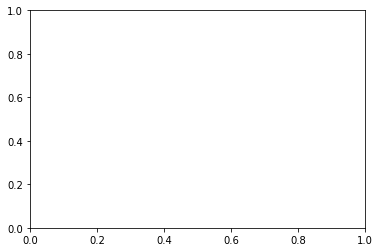

In [91]:
x_axis = np.arange(80,101,1)
for c in co
plt.plot(data_world_wines_df_grouped_country_points)
plt.xticks(rotation='vertical')
plt.grid(True)

plt.title('Average Price By Points')
plt.ylabel('Price ($USD)')
plt.xlabel('Points (Out of 100)')
plt.xticks(x_axis)

In [37]:
data_world_wines_df_grouped_country_points.loc['France']['Price_Float'].fillna(0)

Points
80      10.000000
81      15.333333
82      14.666667
83      16.230769
84      17.795031
85      18.919847
86      19.660550
87      21.415190
88      25.726872
89      29.525424
90      34.232295
91      43.604651
92      53.718487
93      75.125000
94      97.035714
95     200.767857
96     335.000000
97     292.375000
98     274.666667
99       0.000000
100    875.000000
Name: Price_Float, dtype: float64

In [38]:
#loop through top 6 countries to produce combined chart
x_axis = np.arange(80,101,1)
avg_wine_price = data_world_wines_df_grouped_points.mean()['Price_Float']
top6_countries = data_world_wines_df_grouped_country.count()['Price_Float'].nlargest(6)
top6_countries_names = top6_countries.index
top6_countries_names

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile'], dtype='object', name='Country')

In [50]:
data_world_wines_df_grouped_country.mean().index

Index(['Argentina', 'Australia', 'Austria', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'Croatia', 'Czech Republic', 'England', 'France', 'Georgia',
       'Germany', 'Greece', 'Hungary', 'India', 'Israel', 'Italy', 'Lebanon',
       'Luxembourg', 'Macedonia', 'Mexico', 'Moldova', 'Morocco',
       'New Zealand', 'Peru', 'Portugal', 'Romania', 'Serbia', 'Slovenia',
       'South Africa', 'Spain', 'Switzerland', 'Turkey', 'US', 'Ukraine',
       'Uruguay'],
      dtype='object', name='Country')

In [51]:
countries = data_world_wines_df_grouped_country.mean().index

In [52]:
lats =[]
lngs =[]

for country in countries:
    params = {"address": country, "key": gkey}

    # Build URL using the Google Maps API
    base_url = "https://maps.googleapis.com/maps/api/geocode/json"

    # Run request
    response = requests.get(base_url, params=params)

    # Convert to JSON
    country_geo = response.json()

    # Extract lat/lng
    lats.append(country_geo["results"][0]["geometry"]["location"]["lat"])
    lngs.append(country_geo["results"][0]["geometry"]["location"]["lng"])
    print(country)
    print (country_geo["results"][0]["geometry"]["location"]["lat"])
    print (country_geo["results"][0]["geometry"]["location"]["lng"])

    # Print results


Argentina
-38.416097
-63.61667199999999
Australia
-25.274398
133.775136
Austria
47.516231
14.550072
Brazil
-14.235004
-51.92528
Bulgaria
42.733883
25.48583
Canada
56.130366
-106.346771
Chile
-35.675147
-71.542969
Croatia
45.1
15.2000001
Czech Republic
49.81749199999999
15.472962
England
52.3555177
-1.1743197
France
46.227638
2.213749
Georgia
32.1656221
-82.9000751
Germany
51.165691
10.451526
Greece
39.074208
21.824312
Hungary
47.162494
19.5033041
India
20.593684
78.96288
Israel
31.046051
34.851612
Italy
41.87194
12.56738
Lebanon
33.854721
35.862285
Luxembourg
49.815273
6.129582999999999
Macedonia
41.608635
21.745275
Mexico
23.634501
-102.552784
Moldova
47.411631
28.369885
Morocco
31.791702
-7.092619999999999
New Zealand
-40.900557
174.885971
Peru
-9.189967
-75.015152
Portugal
39.39987199999999
-8.224454
Romania
45.943161
24.96676
Serbia
44.016521
21.005859
Slovenia
46.151241
14.995463
South Africa
-30.559482
22.937506
Spain
40.46366700000001
-3.74922
Switzerland
46.818188
8.22751199999

[-38.416097,
 -25.274398,
 47.516231,
 -14.235004,
 42.733883,
 56.130366,
 -35.675147,
 45.1,
 49.81749199999999,
 52.3555177,
 46.227638,
 32.1656221,
 51.165691,
 39.074208,
 47.162494,
 20.593684,
 31.046051,
 41.87194,
 33.854721,
 49.815273,
 41.608635,
 23.634501,
 47.411631,
 31.791702,
 -40.900557,
 -9.189967,
 39.39987199999999,
 45.943161,
 44.016521,
 46.151241,
 -30.559482,
 40.46366700000001,
 46.818188,
 38.963745,
 37.09024,
 48.379433,
 -32.522779]

In [78]:
# data_world_wines_df_grouped_country.mean()['Lat'] = lats
# data_world_wines_df_grouped_country.mean()['Lng'] = lngs
data_world_wines_df_grouped_country_geocodes = data_world_wines_df_grouped_country.mean()
data_world_wines_df_grouped_country_geocodes['Lat'] = lats
data_world_wines_df_grouped_country_geocodes['Lng'] = lngs
data_world_wines_df_grouped_country_geocodes

,Points,Price_Float,Price_Per_Points,Lat,Lng
Country,,,,,
Argentina,86.767105,24.325768,0.275207,-38.416097,-63.616672
Australia,88.660215,37.617391,0.416338,-25.274398,133.775136
Austria,90.197977,29.349736,0.322899,47.516231,14.550072
Brazil,83.888889,17.000000,0.203133,-14.235004,-51.925280
Bulgaria,87.709677,15.612903,0.176716,42.733883,25.485830
Canada,89.480769,36.365385,0.404388,56.130366,-106.346771
Chile,86.480519,20.394995,0.232455,-35.675147,-71.542969
Croatia,87.933333,30.533333,0.344176,45.100000,15.200000
Czech Republic,85.000000,25.000000,0.294118,49.817492,15.472962


In [112]:
# Store latitude and longitude in locations
locations = data_world_wines_df_grouped_country_geocodes[["Lat", "Lng"]]

# Fill NaN values and convert to float
rating = data_world_wines_df_grouped_country_geocodes["Price_Per_Points"].astype(float)
    

In [113]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [91]:
x_axis

array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100])

In [92]:
data_world_wines_df_grouped_country_points.loc[country]['Price_Float'].fillna(0)

Points
81      32.000000
82      25.777778
83      16.222222
84      18.476744
85      20.906977
86      21.976945
87      24.694158
88      32.004016
89      40.616402
90      46.773632
91      52.356828
92      59.312849
93      68.259036
94      79.913978
95     107.468750
96     121.166667
97     120.200000
98      81.666667
99     517.500000
100    270.000000
Name: Price_Float, dtype: float64

In [96]:
data_world_wines_df_grouped_country_points.loc['Chile'].index

Int64Index([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94], dtype='int64', name='Points')

In [97]:
#Regression each country
(slope, intercept, r_value, p_value, std_err) = linregress(x_axis, data_world_wines_df_grouped_country_points.loc['US']['Price_Float'].fillna(0))
fit = slope * x_axis + intercept

(slope_fr, intercept_fr, r_value_fr, p_value_fr, std_err_fr) = linregress(x_axis, data_world_wines_df_grouped_country_points.loc['France']['Price_Float'].fillna(0))
fit_fr = slope_fr * x_axis + intercept_fr

(slope_chile, intercept_chile, r_value_chile, p_value_chile, std_err_chile) = linregress(data_world_wines_df_grouped_country_points.loc['Chile'].index, data_world_wines_df_grouped_country_points.loc['Chile']['Price_Float'].fillna(0))
fit_chile = slope_chile * x_axis + intercept_chile

(slope_germany, intercept_germany, r_value_germany, p_value_germany, std_err_germany) = linregress(data_world_wines_df_grouped_country_points.loc['Germany'].index, data_world_wines_df_grouped_country_points.loc['Germany']['Price_Float'].fillna(0))
fit_germany = slope_germany * x_axis + intercept_germany

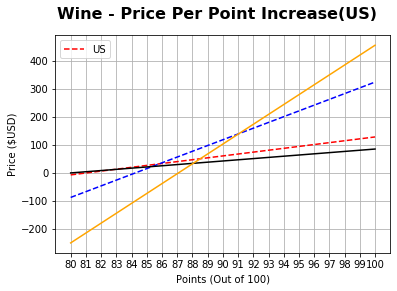

In [106]:
fig, ax = plt.subplots()

fig.suptitle("Wine - Price Per Point Increase(US)", fontsize=16, fontweight="bold")

ax.set_xlabel('Points (Out of 100)')
ax.set_ylabel('Price ($USD)')
plt.xticks(x_axis)
plt.grid(True)

# ax.plot(x_axis, data_world_wines_df_grouped_points.mean()['Price_Float'], linewidth=0, marker='o')
#'b--' blue line with dashes
ax.plot(x_axis, fit, 'r--',label='US')
ax.plot(x_axis, fit_fr, 'b--')
ax.plot(x_axis, fit_chile, 'black')
ax.plot(x_axis, fit_germany, 'orange')
plt.legend()



plt.show()

In [105]:
#show second chart with labels 

In [ ]:
# anova
group1 = df[df["HairColour"] == "LightBlond"]["Pain"]
group2 = df[df["HairColour"] == "DarkBlond"]["Pain"]
group3 = df[df["HairColour"] == "LightBrunette"]["Pain"]
group4 = df[df["HairColour"] == "DarkBrunette"]["Pain"]

In [ ]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)